In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   

In [156]:
data = pd.read_csv('AAP_data.csv')

In [157]:
dataset = data

In [158]:
data

,date,open,high,low,close,volume,Name
0,2013-02-08,78.34,79.7200,78.0100,78.90,1298137,AAP
1,2013-02-11,78.65,78.9100,77.2300,78.39,758016,AAP
2,2013-02-12,78.39,78.6300,77.5132,78.60,876859,AAP
3,2013-02-13,78.90,79.1300,77.8500,78.97,1038574,AAP
4,2013-02-14,78.66,79.7200,78.5850,78.84,1005376,AAP
...,...,...,...,...,...,...,...
1254,2018-02-01,116.24,118.8300,115.8300,117.29,760629,AAP
1255,2018-02-02,115.92,117.1800,113.1250,113.93,1092333,AAP
1256,2018-02-05,113.05,114.9700,109.8100,109.86,1281592,AAP
1257,2018-02-06,108.28,113.1100,106.7450,112.20,1240784,AAP


In [151]:
import pandas as pd
import numpy as np

df1 = data

# Convert the 'date' column to a datetime object
df1['date'] = pd.to_datetime(df1['date'])

# добавление столбца со средней ценой акции
df1['average'] = (df1['open'] + df1['high'] + df1['low'] + df1['close']) / 4

# Удаляем столбцы, которые не нужны для предсказания
df1.drop(['open', 'high', 'low', 'close', 'volume', 'Name'], axis=1, inplace=True)

# Преобразуем индекс в формат datetime
df1.index = pd.to_datetime(df1.index)

# Разделяем данные на обучающую и тестовую выборки
train_size = int(len(df1) * 0.8)
train_data, test_data = df1[:train_size], df1[train_size:]

# Преобразуем данные в массивы numpy
X_train, y_train = train_data.drop('average', axis=1).values, train_data['average'].values
X_test, y_test = test_data.drop('average', axis=1).values, test_data['average'].values

In [152]:
from sklearn.ensemble import RandomForestRegressor


# Создаем объект модели и обучаем ее на обучающих данных
model = RandomForestRegressor(n_estimators=100, random_state=10)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

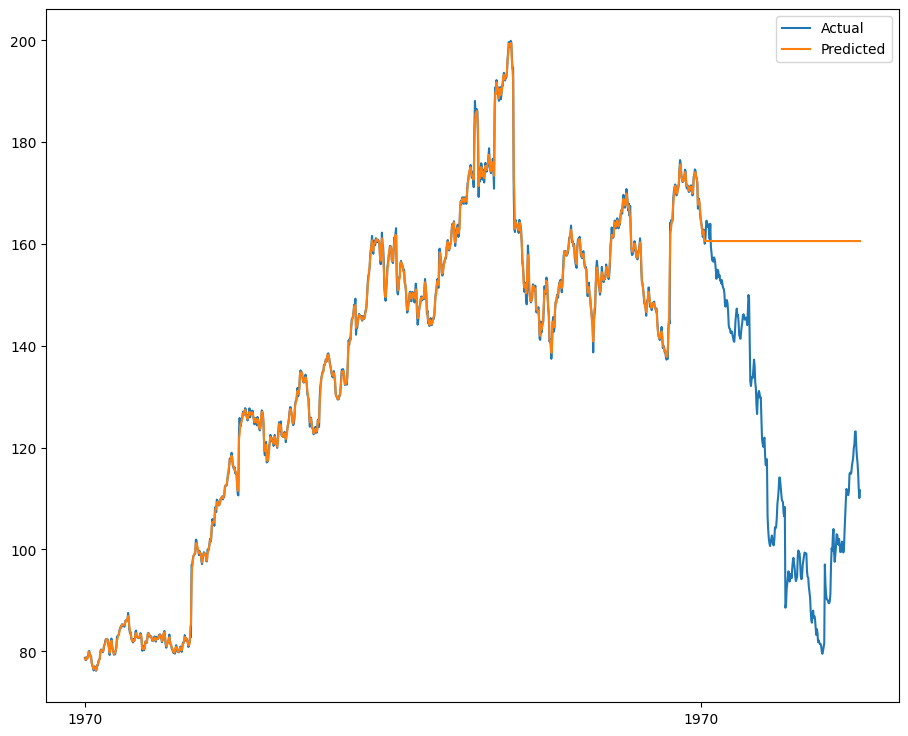

In [153]:
import matplotlib.pyplot as plt

# Получаем предсказания на всей выборке
y_pred = model.predict(df1.drop('average', axis=1).values)

# Рисуем график
plt.plot(df1.index, df1['average'], label='Actual')
plt.plot(df1.index, y_pred, label='Predicted')
plt.legend()
plt.show()

open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64
             open   high      low  close     volume Name  average
date                                                             
2013-02-08  78.34  79.72  78.0100  78.90  1298137.0  AAP  78.7425
2013-02-09  78.34  79.72  78.0100  78.90  1298137.0  AAP  78.7425
2013-02-10  78.34  79.72  78.0100  78.90  1298137.0  AAP  78.7425
2013-02-11  78.65  78.91  77.2300  78.39   758016.0  AAP  78.2950
2013-02-12  78.39  78.63  77.5132  78.60   876859.0  AAP  78.2833


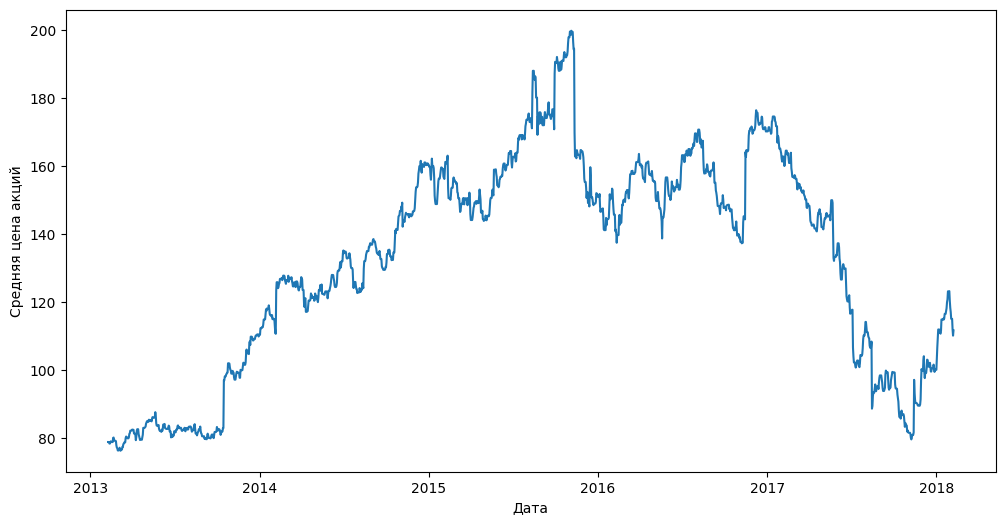

In [94]:
df = data
# установка индекса датафрейма
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# ресемплирование данных для ежедневного интервала
df = df.resample('D').last().ffill()

# проверка наличия пропущенных значений
print(df.isna().sum())

# добавление столбца со средней ценой акции
df['average'] = (df['open'] + df['high'] + df['low'] + df['close']) / 4

# вывод первых 5 строк датафрейма для проверки
print(df.head())

# построение графика изменения средней цены акций
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['average'])
plt.xlabel('Дата')
plt.ylabel('Средняя цена акций')
plt.show()


In [113]:
df

,open,high,low,close,volume,Name,average
date,,,,,,,
2013-02-08,78.34,79.7200,78.0100,78.90,1298137.0,AAP,78.742500
2013-02-09,78.34,79.7200,78.0100,78.90,1298137.0,AAP,78.742500
2013-02-10,78.34,79.7200,78.0100,78.90,1298137.0,AAP,78.742500
2013-02-11,78.65,78.9100,77.2300,78.39,758016.0,AAP,78.295000
2013-02-12,78.39,78.6300,77.5132,78.60,876859.0,AAP,78.283300
...,...,...,...,...,...,...,...
2018-02-03,115.92,117.1800,113.1250,113.93,1092333.0,AAP,115.038750
2018-02-04,115.92,117.1800,113.1250,113.93,1092333.0,AAP,115.038750
2018-02-05,113.05,114.9700,109.8100,109.86,1281592.0,AAP,111.922500


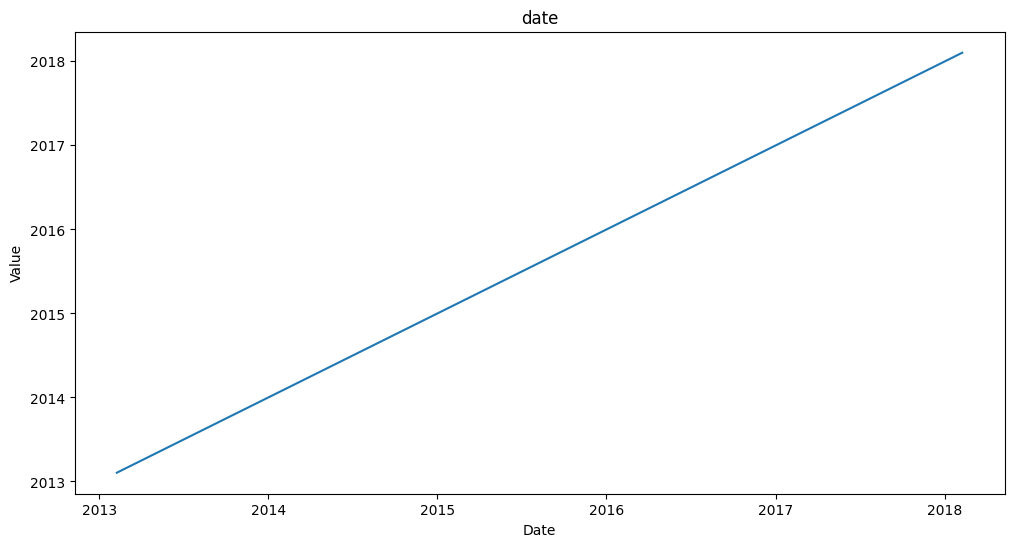

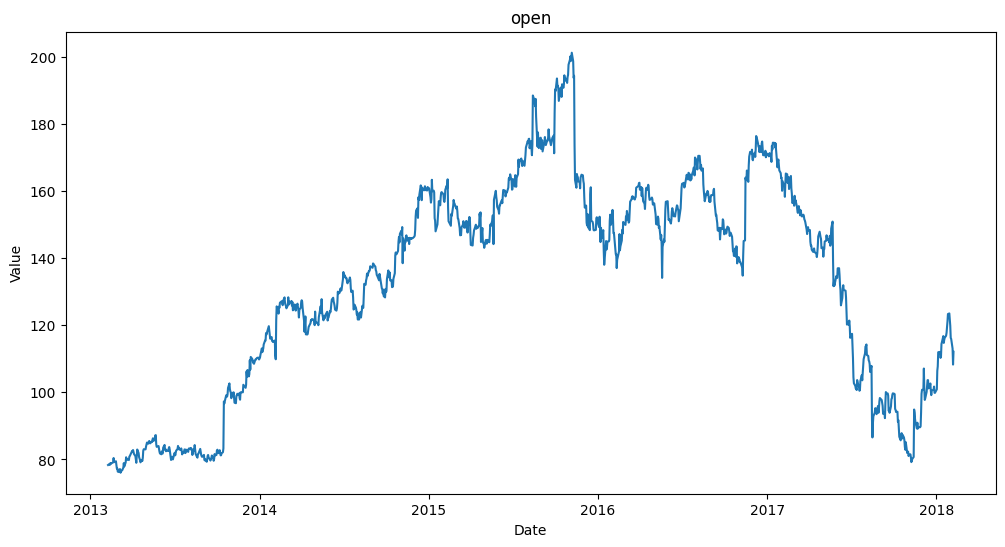

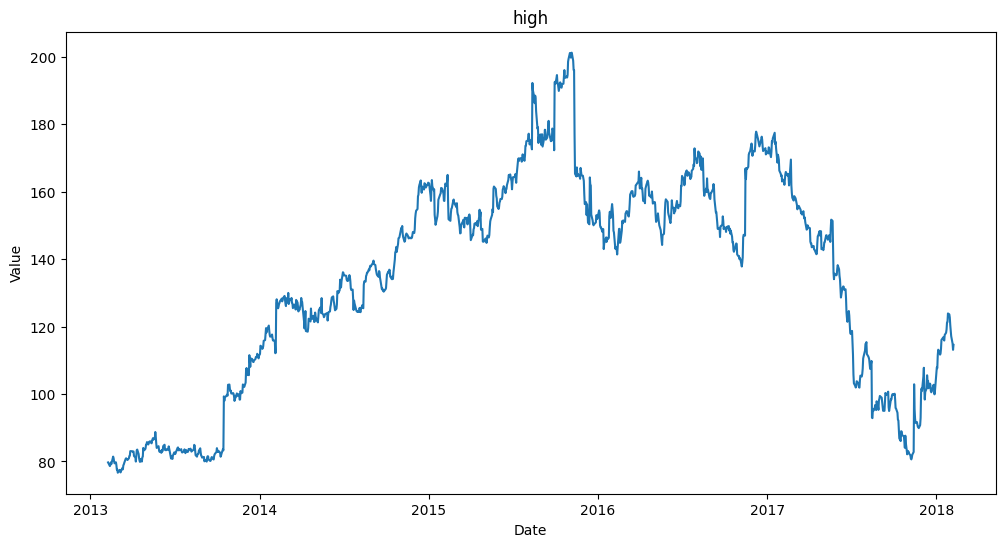

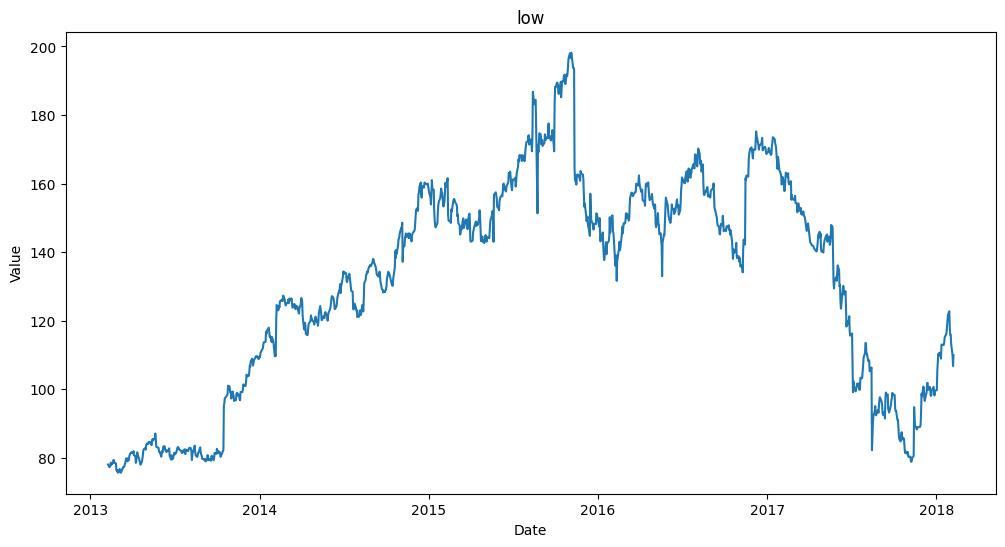

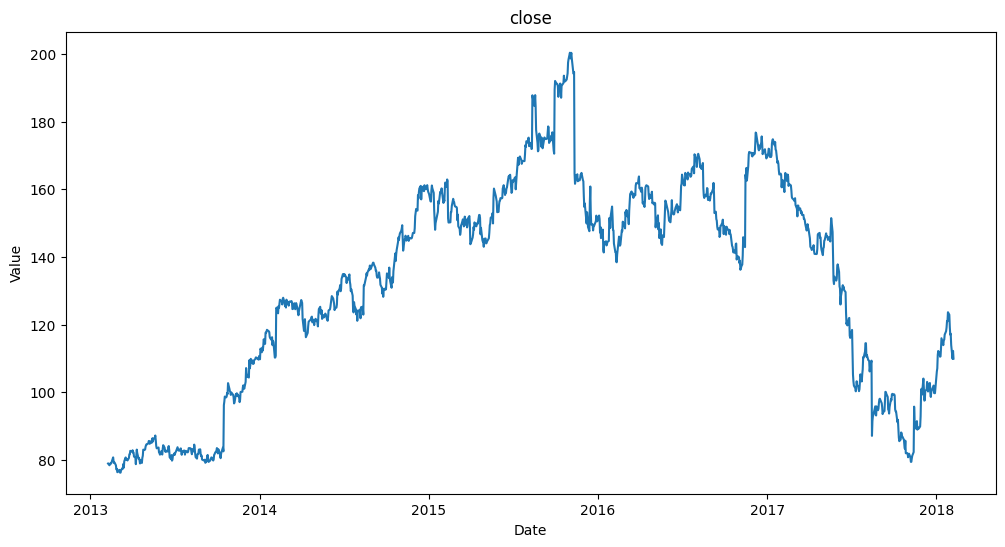

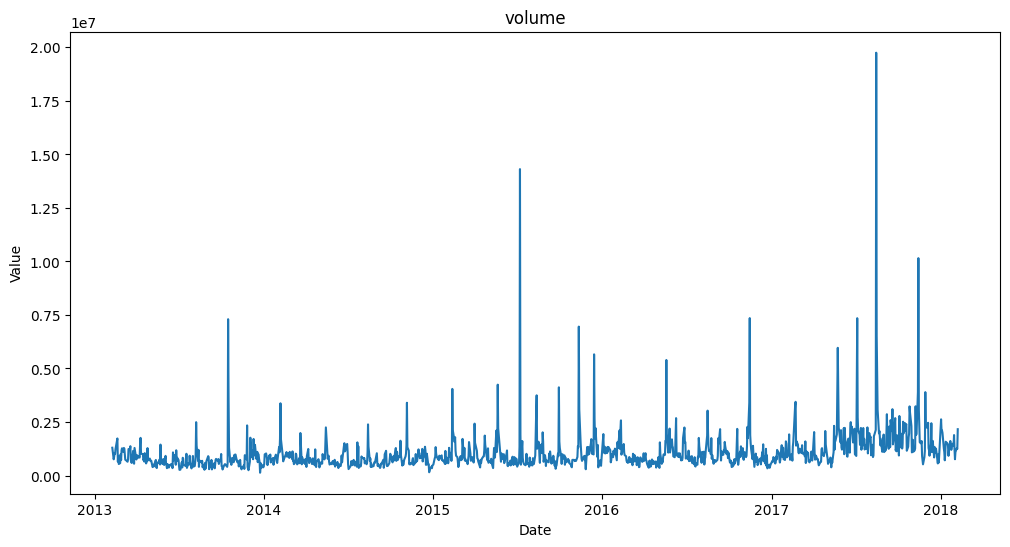

In [106]:
import matplotlib.pyplot as plt

# Создаем список столбцов, для которых нужно построить графики
columns_to_plot = [col for col in dataset.columns if col != 'Name']

# Строим графики для каждого столбца
for col in columns_to_plot:
    plt.figure(figsize=(12,6))
    plt.plot(dataset['date'], dataset[col])
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()

In [90]:
df_smoothed = df.rolling(window=12).mean()

<ipython-input-90-4738e714724d>:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Name'], dtype='object')
  df_smoothed = df.rolling(window=12).mean()


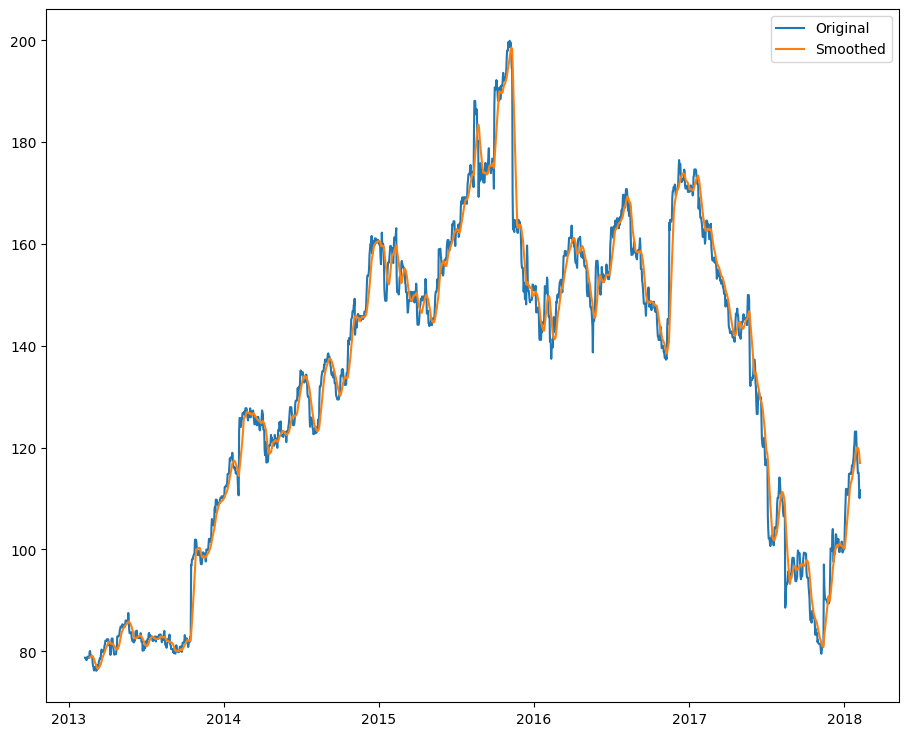

In [91]:
plt.plot(df.index, df['average'], label='Original')
plt.plot(df_smoothed.index, df_smoothed['average'], label='Smoothed')
plt.legend()
plt.show()     